In [62]:
from pycox.datasets import from_kkbox

kkbox_data = from_kkbox._DatasetKKBoxChurn()
kkbox_data.download_kkbox()

100%|██████████| 32.0M/32.0M [00:03<00:00, 10.0MB/s]


100%|██████████| 675M/675M [00:48<00:00, 14.7MB/s] 


100%|██████████| 231M/231M [00:20<00:00, 12.0MB/s] 



Extracting 'train'...
Finished extracting 'train'.
Extracting 'transactions'...
Finished extracting 'transactions'.
Extracting 'members_v3'...
Finished extracting 'members_v3'.
Making feather data frames...
Creating survival data...
Creating covariates...


/home/r10user10/Documents/anaconda3/envs/python310/lib/python3.10/site-packages/pycox/datasets/from_kkbox.py:339: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  fixed_date = pd.datetime(2017, 3, 1)


Creating train/test/val subsets...
Cleaning up...
Done! You can now call `df = kkbox.read_df()`.


In [158]:
df = kkbox_data.read_df()
df.head(5)

,msno,event,n_prev_churns,log_days_between_subs,duration,log_days_since_reg_init,log_payment_plan_days,log_plan_list_price,log_actual_amount_paid,is_auto_renew,is_cancel,city,gender,registered_via,age_at_start,strange_age,nan_days_since_reg_init,no_prev_churns
0,khTQl3B7k10IA9zPMpm5jMc4VxHKh+mo8ngDaos2Od4=,1.0,0.0,0.0,7.0,0.000000,2.079442,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,-1.0,0.0,1.0,1.0
1,2jy816+2+7/UYg7RNhP1PnifBmP9CL0/3ioqGBg/jrc=,0.0,0.0,0.0,694.0,4.262680,3.433987,5.017280,5.017280,0.0,0.0,15,NaN,9,0.0,1.0,0.0,1.0
2,yTnAG21OBNMRG6yL2ovgHG5zJ2GFTRpRZDVP04dqsKY=,1.0,0.0,0.0,61.0,0.000000,3.433987,5.010635,0.000000,1.0,0.0,NaN,NaN,NaN,-1.0,0.0,1.0,1.0
3,PU3abZF43MOIGUKry3qu9vetFKi1d7BlJ8//Kk4zIHY=,0.0,0.0,0.0,58.0,0.693147,3.433987,4.615121,4.615121,1.0,0.0,1,NaN,7,-0.0,1.0,0.0,1.0
4,h7n6QC+6LkEsVtWHknIABBGN87SSMhu1cCEYq0f5lxw=,1.0,0.0,0.0,30.0,0.693147,3.433987,5.010635,0.000000,1.0,0.0,13,female,7,0.0,1.0,0.0,1.0


In [143]:
df['n_prev_churns'].value_counts()

0.0    1581380
1.0     152599
2.0      38192
3.0      10541
4.0       3052
5.0        500
6.0         82
7.0         12
Name: n_prev_churns, dtype: int64

In [147]:
df['log_days_between_subs'].value_counts()

0.000000    1668528
3.465736       6977
3.496508       4461
3.637586       3502
3.663562       2430
             ...   
6.536692          1
6.502790          1
6.489205          1
6.452049          1
6.517671          1
Name: log_days_between_subs, Length: 650, dtype: int64

In [145]:
df['duration'].value_counts()

30.0     228480
7.0      164844
5.0       61972
29.0      45301
790.0     35678
          ...  
665.0       175
817.0       110
820.0       102
818.0        97
819.0        94
Name: duration, Length: 820, dtype: int64

In [146]:
df['event'].value_counts()

1.0    1279377
0.0     506981
Name: event, dtype: int64

In [149]:
import numpy as np
import pandas as pd

e = np.array(df.event)
t = np.array(df.duration)
x = df.drop(columns=['event','duration','msno','gender','city','registered_via'])

In [100]:
import random
city_nan = random.randint(1,22)
x['city'].fillna(city_nan)

0          10
1          15
2          10
3           1
4          13
           ..
1786353    10
1786354     4
1786355    12
1786356    14
1786357    10
Name: city, Length: 1786358, dtype: category
Categories (21, int64): [1, 3, 4, 5, ..., 19, 20, 21, 22]

In [110]:
x['city'] = le.fit_transform(x['city'])
x['city']

0          21
1          13
2          21
3           0
4          11
           ..
1786353    21
1786354     2
1786355    10
1786356    12
1786357    21
Name: city, Length: 1786358, dtype: int64

In [111]:
x['registered_via'] = le.fit_transform(x['registered_via'])
x['registered_via']

0          7
1          3
2          7
3          2
4          2
          ..
1786353    7
1786354    1
1786355    0
1786356    3
1786357    7
Name: registered_via, Length: 1786358, dtype: int64

In [112]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['gender'] = le.fit_transform(x['gender'])
x['gender']

0          2
1          2
2          2
3          2
4          0
          ..
1786353    2
1786354    0
1786355    1
1786356    0
1786357    2
Name: gender, Length: 1786358, dtype: int64

In [167]:
x = np.array(x).astype(float)
np.where(np.isnan(x) == True)

(array([], dtype=int64), array([], dtype=int64))

In [152]:
import os, sys
import numpy as np 
#path = os.getcwd()
path = '/home/r10user10/Documents/Jiacheng/dspm-auton-survival'
os.chdir(path)

from auton_survival import datasets
# outcomes, features, interventions = datasets.load_dataset("SYNTHETIC")
# x, t, e = np.array(x), np.array(t), np.array(e)

In [153]:
# t = np.array(outcomes.time)
# e = np.array(outcomes.event)
# x = np.array(features)


In [154]:
# from auton_survival.preprocessing import Preprocessor

# cat_feats = ['sex', 'dzgroup', 'dzclass', 'income', 'race', 'ca']
# num_feats = ['age', 'num.co', 'meanbp', 'wblc', 'hrt', 'resp',
#              'temp', 'pafi', 'alb', 'bili', 'crea', 'sod', 'ph',
#              'glucose', 'bun', 'urine', 'adlp', 'adls']

# features = Preprocessor().fit_transform(features, cat_feats=cat_feats, num_feats=num_feats)

# import numpy as np

# horizons = [0.25, 0.5, 0.75]
# times = np.quantile(outcomes.time[outcomes.event == 1], horizons).tolist()

# x, t, e = features.values.astype(float), outcomes.time.values.astype(float), outcomes.event.values.astype(float)

n = len(x)

tr_size = int(n * 0.70)
vl_size = int(n * 0.10)
te_size = int(n * 0.20)

print(tr_size, vl_size, te_size)

x_train, x_test, x_val = x[:tr_size], x[-te_size:], x[tr_size:tr_size + vl_size]
t_train, t_test, t_val = t[:tr_size], t[-te_size:], t[tr_size:tr_size + vl_size]
e_train, e_test, e_val = e[:tr_size], e[-te_size:], e[tr_size:tr_size + vl_size]

1250450 178635 357271


In [160]:
models = []

from auton_survival.models.dpsm import DeepDP
from auton_survival.models.dsm import DeepSurvivalMachines

# model = DeepDP(k=3,
#                distribution='LogNormal',
#                layers=[100])
model = DeepSurvivalMachines(
    k=4,
    distribution="LogNormal",
    # distribution="Weibull",
    layers=[100]
)
# The fit method is called to train the model
model.fit(x_train, t_train, e_train, iters=1, learning_rate=0.001)

100%|██████████| 1/1 [00:33<00:00, 33.78s/it]


In [163]:
model.compute_nll(x,t,e)

nan

In [161]:
trained_weights = model.trained_weights
print(trained_weights.shape)
print(np.isnan(trained_weights))

(1, 1062883, 4)
[[[False False False False]
  [False False False False]
  [False False False False]
  ...
  [ True  True  True  True]
  [ True  True  True  True]
  [ True  True  True  True]]]


In [157]:
horizons = [0.25, 0.5, 0.75]
times = np.quantile(t[e == 1], horizons).tolist()
out_risk = model.predict_risk(x_test, times)
out_survival = model.predict_survival(x_test, times)

from sksurv.metrics import concordance_index_ipcw, brier_score, cumulative_dynamic_auc

cis = []
brs = []

et_train = np.array([(e_train[i], t_train[i]) for i in range(len(e_train))],
                 dtype = [('e', bool), ('t', float)])
et_test = np.array([(e_test[i], t_test[i]) for i in range(len(e_test))],
                 dtype = [('e', bool), ('t', float)])
et_val = np.array([(e_val[i], t_val[i]) for i in range(len(e_val))],
                 dtype = [('e', bool), ('t', float)])

for i, _ in enumerate(times):
    cis.append(concordance_index_ipcw(et_train, et_test, out_risk[:, i], times[i])[0])
brs.append(brier_score(et_train, et_test, out_survival, times)[1])
roc_auc = []
for i, _ in enumerate(times):
    roc_auc.append(cumulative_dynamic_auc(et_train, et_test, out_risk[:, i], times[i])[0])
for horizon in enumerate(horizons):
    print(f"For {horizon[1]} quantile")
    print("TD Concordance Index:", cis[horizon[0]])
    print("Brier Score:", brs[0][horizon[0]])
    print("ROC AUC ", roc_auc[horizon[0]][0], "\n")

ValueError: Input estimate contains NaN.

In [ ]:
out_risk

array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       ...,
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]])

/tmp/ipykernel_968120/98818783.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(trained_weights[iter_idx[idx]][:, 0], fill=True, ax=axes[idx])
/tmp/ipykernel_968120/98818783.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(trained_weights[iter_idx[idx]][:, 1], fill=True, ax=axes[idx])
/tmp/ipykernel_968120/98818783.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(trained_weights[iter_idx[idx]][:, 2], fill=True, ax=axes[idx])
/tmp/ipykernel_968120/98818783.py:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(trained_weights[iter_idx[idx]][:, 3], fill=True, ax=axes[idx])
/tmp/ipykernel_968120/98818783.py:8: UserWarning: Dataset has 0 variance; skip

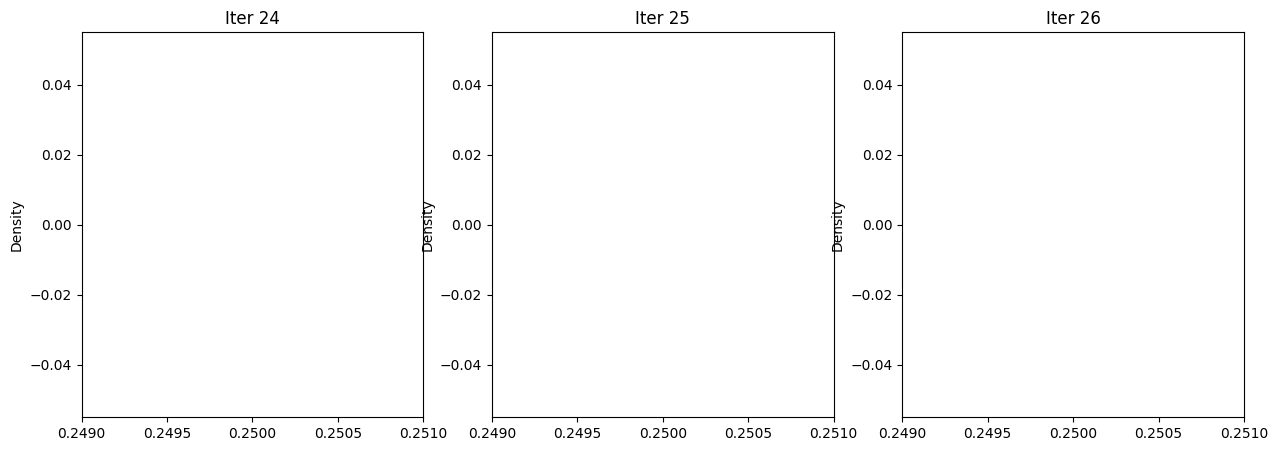

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

figs, axes = plt.subplots(1, 3, figsize=(15, 5))
iter_idx = [24, 25, 26]

for idx in range(3):
    sns.kdeplot(trained_weights[iter_idx[idx]][:, 0], fill=True, ax=axes[idx])
    sns.kdeplot(trained_weights[iter_idx[idx]][:, 1], fill=True, ax=axes[idx])
    sns.kdeplot(trained_weights[iter_idx[idx]][:, 2], fill=True, ax=axes[idx])
    sns.kdeplot(trained_weights[iter_idx[idx]][:, 3], fill=True, ax=axes[idx])
    axes[idx].set_title(f'Iter {iter_idx[idx]}')
    axes[idx].set_xlim(0.249, 0.251)

# sns.kdeplot(trained_weights[iter_idx][:, 0], fill=True)
# sns.kdeplot(trained_weights[iter_idx][:, 1], fill=True)
# sns.kdeplot(trained_weights[iter_idx][:, 2], fill=True)
# plt.title(f'Iter {iter_idx}')